# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import roc_curve, auc
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
colnames = ['preg', 'plas', 'bpres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("prima-indians-diabetes.data",names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.head(10)

,preg,plas,bpres,skin,insulin,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg       768 non-null int64
plas       768 non-null int64
bpres      768 non-null int64
skin       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
pedi       768 non-null float64
age        768 non-null int64
class      768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
pima_df['plas']=pima_df['plas'].replace(0,pima_df['plas'].median())
pima_df['bpres']=pima_df['bpres'].replace(0,pima_df['bpres'].median())
pima_df['skin']=pima_df['skin'].replace(0,pima_df['skin'].median())
pima_df['insulin']=pima_df['insulin'].replace(0,pima_df['insulin'].median())
pima_df.head()

,preg,plas,bpres,skin,insulin,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [6]:
pima_df.describe()

,preg,plas,bpres,skin,insulin,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

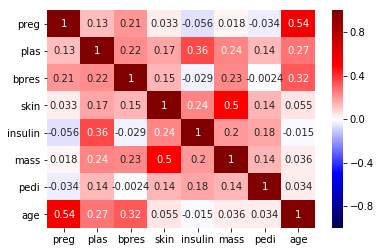

In [104]:
sns.heatmap(pima_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


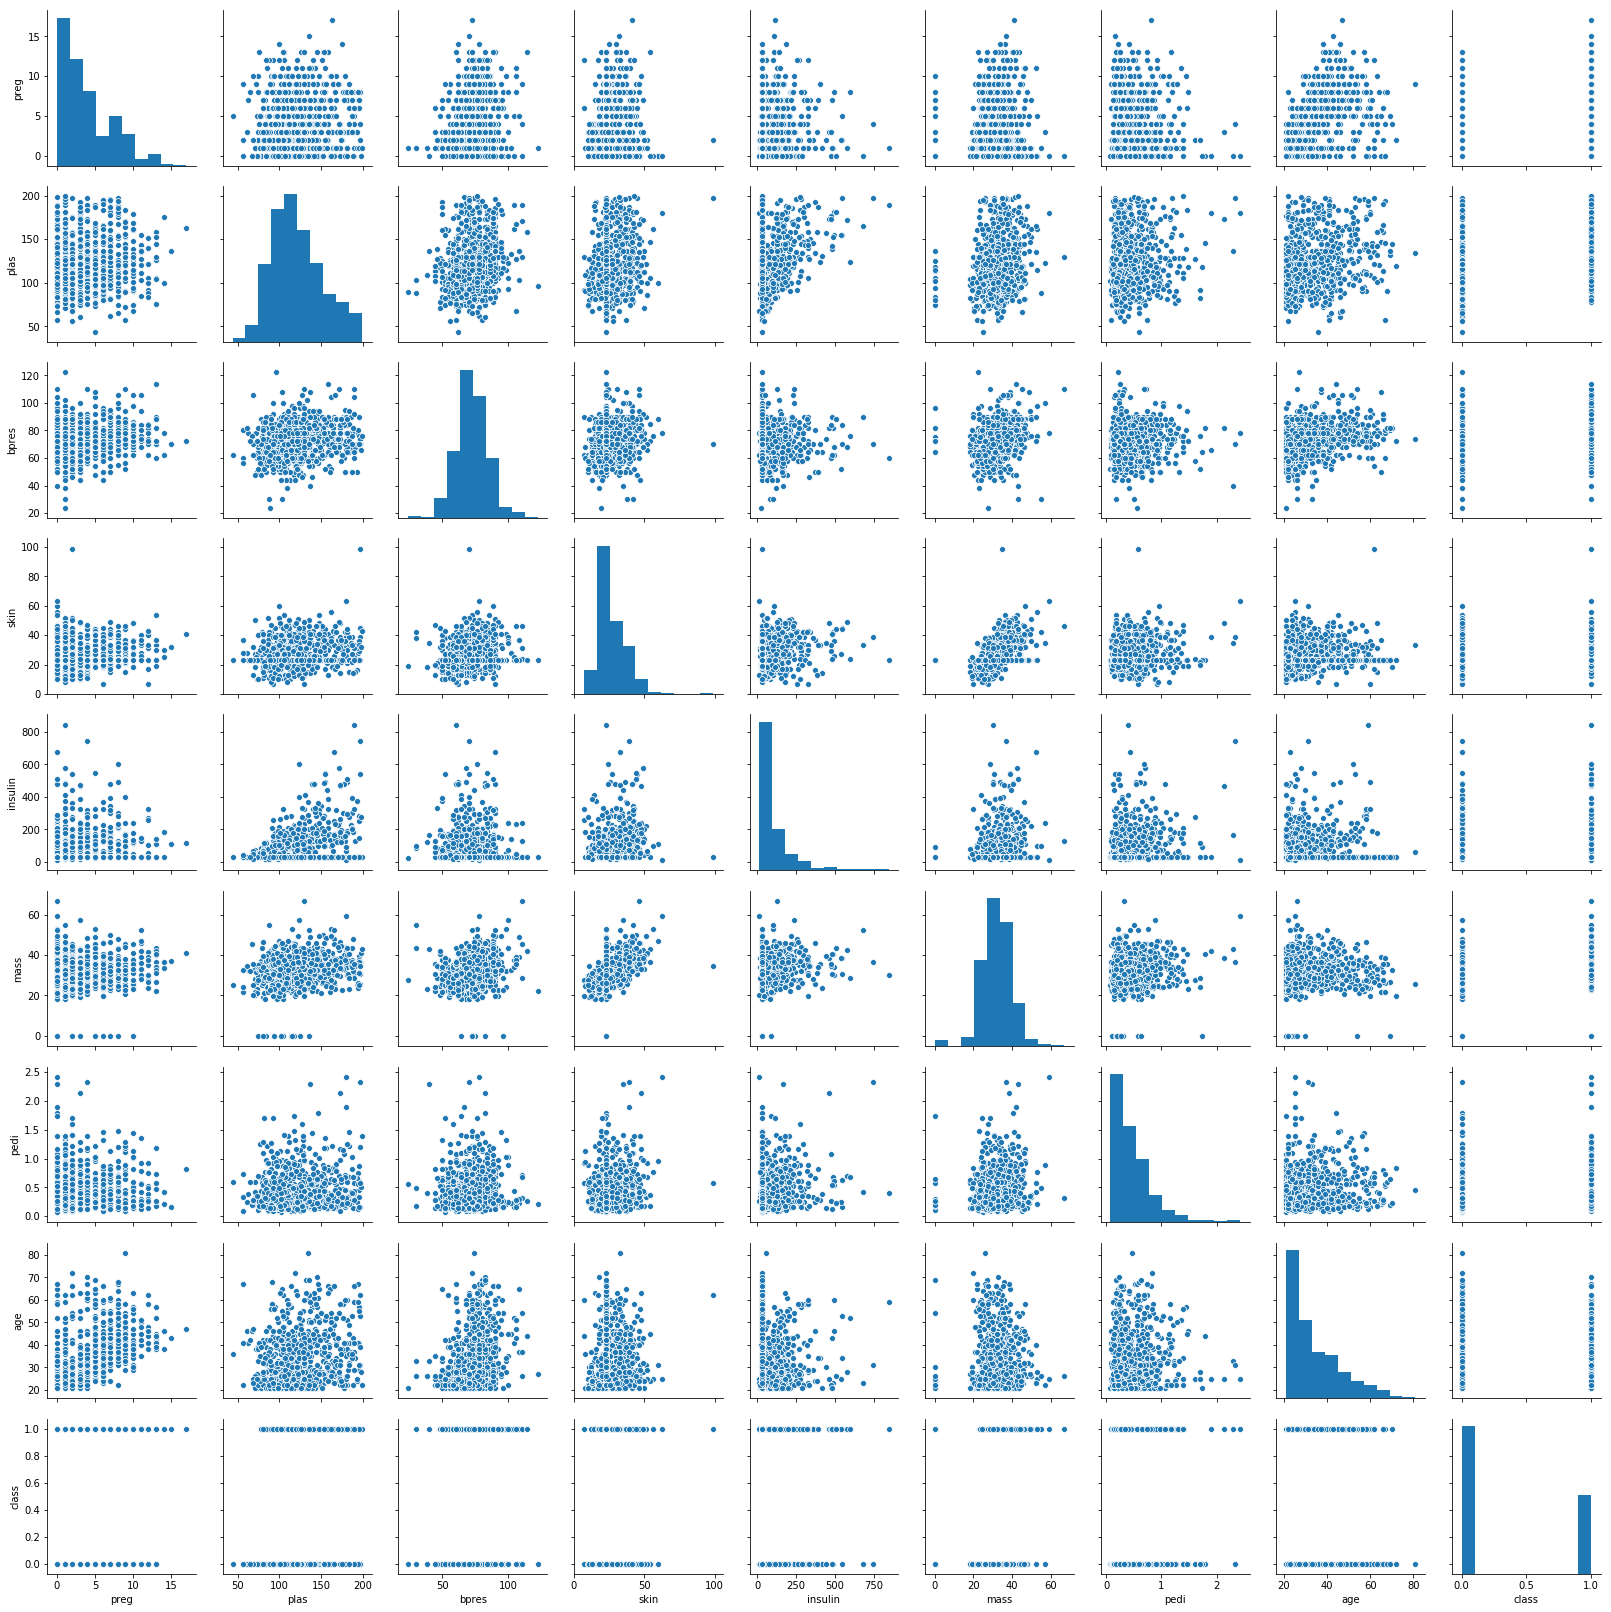

In [7]:
# Pairplot using sns
sns.pairplot(pima_df)

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [20]:
pima_df['class'] = pima_df['class'].replace({0: 'Healthy', 1: 'Diabetic'})
X = pima_df[['preg', 'plas', 'bpres', 'skin', 'insulin', 'mass', 'pedi', 'age']]
y =  pima_df['class']

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [99]:
Xtrain=np.array(xtrain)
Ytrain=np.array(ytrain)
Xtest=np.array(xtest)
Ytest=np.array(ytest)
modeldst=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
modeldst.fit(Xtrain,Ytrain)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [100]:
ypreddst=modeldst.predict(Xtest)
acc1=metrics.accuracy_score(Ytest,ypreddst)
print(acc1)
cm=metrics.confusion_matrix(Ytest,ypreddst)
print(cm)

0.7532467532467533
[[ 46  28]
 [ 29 128]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=2)

In [75]:
Rf_model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [76]:
y_predict_Rf=Rf_model.predict(xtest)
Rf_acc=metrics.accuracy_score(ytest,y_predict_Rf)
print(Rf_acc)

0.7878787878787878


In [77]:
y_predict_Rf=Rf_model.predict(xtrain)
Rf_acc=metrics.accuracy_score(ytrain,y_predict_Rf)
print(Rf_acc)

1.0


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [78]:
from sklearn.ensemble import AdaBoostClassifier
boost_rf=AdaBoostClassifier(base_estimator=Rf_model,n_estimators=51,random_state=2)
boost_rf.fit(xtrain, ytrain)
y_predict_adaboostRf=boost_rf.predict(xtest)
adboostRf_acc=metrics.accuracy_score(ytest,y_predict_adaboostRf)
print(adboostRf_acc)

0.7792207792207793


In [79]:
y_predict_adaboostRf=boost_rf.predict(xtrain)
adboostRf_acc=metrics.accuracy_score(ytrain,y_predict_adaboostRf)
print(adboostRf_acc)

1.0


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [83]:
from sklearn.ensemble import BaggingClassifier
bag_dst=BaggingClassifier(base_estimator=modeldst,n_estimators=10,random_state=2)
bag_dst.fit(xtrain, ytrain)
y_predict_bagdst=bag_dst.predict(xtest)
bagdst_acc=metrics.accuracy_score(ytest,y_predict_bagdst)
print(bagdst_acc)

0.7619047619047619


In [84]:
y_predict_bagdst=bag_dst.predict(xtrain)
bagdst_acc=metrics.accuracy_score(ytrain,y_predict_bagdst)
print(bagdst_acc)

0.8119180633147114


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gb_model=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [93]:
gb_model.fit(xtrain, ytrain)
y_predict_gb_model=gb_model.predict(xtest)
gb_model_acc=metrics.accuracy_score(ytest,y_predict_gb_model)
print(gb_model_acc)

0.7878787878787878


In [94]:
y_predict_gb_model=gb_model.predict(xtrain)
gb_model_acc=metrics.accuracy_score(ytrain,y_predict_gb_model)
print(gb_model_acc)

0.8808193668528864


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.